In [1]:
import pandas as pd, numpy as np
import re
from matplotlib import pyplot as plt

In [2]:
cyan_diamond = dict(markerfacecolor='c', marker='D')
blue_diamond = dict(markerfacecolor='b', marker='D')
magenta_diamond = dict(markerfacecolor='m', marker='D')

In [3]:
def parse(file_path, pattern="Accuracy Score"):
    scores = []
    count = 0
    print (file_path)
    with open(file_path, 'r') as f:
        line = f.readline()
        while line:
            count = count + 1
            # print ("count : {0}".format(count))
            match = re.search(pattern + "\s*:* (\d*..*)", line)
            
            if match:
                score = float(match.group(1))
                # print ("score : {0}".format(score))
                scores.append(score)
            line = f.readline()

    return scores

In [4]:
def parse_metric(file_path):
    group_metrics = []
    with open(file_path, 'r') as f:
        message = f.readline()
        while message:            
            if message.startswith('REPORT'):
                duration = re.search(r'(?<=\tDuration:\s)(.*?)(?=\sms)', message).group(0)
                billed_duration = re.search(r'(?<=\tBilled\sDuration:\s)(.*?)(?=\sms)', message).group(0)

                # Megabytes
                memory_size = re.search(r'(?<=\tMemory\sSize:\s)(.*?)(?=\sMB)', message).group(0)
                max_memory_used = re.search(r'(?<=\tMax\sMemory\sUsed:\s)(.*?)(?=\sMB)', message).group(0)

                metrics = {
                    'duration': duration,
                    'billed_duration': billed_duration,
                    'memory_size': memory_size,
                    'max_memory_used':max_memory_used
                }
                group_metrics.append(metrics)

            message = f.readline()

    return group_metrics

In [5]:
def retrieve_result(file_path):
    total_duration = 0
    total_billed_duration = 0
    total_max_memory_used = 0
    max_memory_used = 0
    memory_size = 0
    group_metrics = parse_metric(file_path)
    invoke_time = len(group_metrics)

    for metrics in group_metrics:
        total_duration += float(metrics['duration'])
        total_billed_duration += float(metrics['billed_duration'])
        temp = int(metrics['max_memory_used'])
        total_max_memory_used = total_max_memory_used + temp
        
        if temp > max_memory_used:
            max_memory_used = temp
        memory_size = int(metrics['memory_size'])
    
    duration_per_invocation = total_duration / invoke_time
    compute_charge = total_billed_duration * 0.001 * (memory_size / 1024)
    
    # cost = compute charge + request charge
    cost = 0.00001667 * compute_charge

    # Other metrics can be calculated here:
    # Total / Average / Stdev of metrics
    

    metrics = {
        "total_duration" : total_duration, 
        "total_billed_duration" : total_billed_duration,
        "average_billed_duration" : total_billed_duration / invoke_time,
        "average_max_memory_used" : total_max_memory_used / invoke_time,
        "max_memory_used" : max_memory_used, 
        "memory_size" : memory_size, 
        "duration_per_invocation" : duration_per_invocation, 
        "compute_charge" : compute_charge,
        "cost" : cost,
        "invoke_time" : invoke_time
    }

    print (metrics)

## Metric Calculation

In [19]:
retrieve_result("../cloudwatch/Opt_Memory/Multi_Regression_log_255.txt")

{'total_duration': 3313931.5199999977, 'total_billed_duration': 3326000.0, 'average_billed_duration': 13043.137254901962, 'average_max_memory_used': 344.4627450980392, 'max_memory_used': 371, 'memory_size': 1024, 'duration_per_invocation': 12995.809882352933, 'compute_charge': 3326.0, 'cost': 0.05544442, 'invoke_time': 255}


In [20]:
retrieve_result("../cloudwatch/Opt_Memory/Prophet_log_384.txt")

{'total_duration': 10820352.170000004, 'total_billed_duration': 10840300.0, 'average_billed_duration': 28229.947916666668, 'average_max_memory_used': 293.0442708333333, 'max_memory_used': 303, 'memory_size': 1664, 'duration_per_invocation': 28178.000442708344, 'compute_charge': 17615.487500000003, 'cost': 0.2936501766250001, 'invoke_time': 384}


In [31]:
retrieve_result("../cloudwatch/Opt_Memory/20_Test/Neural_Network_log_432.txt")

{'total_duration': 1735711.1200000008, 'total_billed_duration': 1757000.0, 'average_billed_duration': 4067.1296296296296, 'average_max_memory_used': 324.18055555555554, 'max_memory_used': 336, 'memory_size': 1856, 'duration_per_invocation': 4017.849814814817, 'compute_charge': 3184.5625, 'cost': 0.053086656875000006, 'invoke_time': 432}


In [27]:
retrieve_result("../cloudwatch/Opt_Memory/20_Test/SVC_log_512.txt")

{'total_duration': 454958.9600000004, 'total_billed_duration': 482000.0, 'average_billed_duration': 941.40625, 'average_max_memory_used': 198.4375, 'max_memory_used': 206, 'memory_size': 832, 'duration_per_invocation': 888.5917187500008, 'compute_charge': 391.625, 'cost': 0.006528388750000001, 'invoke_time': 512}


In [8]:
retrieve_result("../cloudwatch/Opt_Memory/20_Test/XGBoost_log_768.txt")

{'total_duration': 19042538.369999986, 'total_billed_duration': 19082200.0, 'average_billed_duration': 24846.614583333332, 'average_max_memory_used': 229.28255208333334, 'max_memory_used': 239, 'memory_size': 1280, 'duration_per_invocation': 24794.971835937482, 'compute_charge': 23852.75, 'cost': 0.39762534250000003, 'invoke_time': 768}


## Max Memory Metric

In [16]:
retrieve_result("../cloudwatch/Max_Memory/Multi_Regression_log_max.txt")

{'total_duration': 2441901.7899999986, 'total_billed_duration': 2454600.0, 'average_billed_duration': 9625.882352941177, 'average_max_memory_used': 315.7450980392157, 'max_memory_used': 338, 'memory_size': 3008, 'duration_per_invocation': 9576.085450980387, 'compute_charge': 7210.3875, 'cost': 0.12019715962500001, 'invoke_time': 255}


In [23]:
retrieve_result("../cloudwatch/Max_Memory/Prophet_log_max.txt")

{'total_duration': 4506777.7, 'total_billed_duration': 4525300.0, 'average_billed_duration': 11784.635416666666, 'average_max_memory_used': 326.7604166666667, 'max_memory_used': 339, 'memory_size': 3008, 'duration_per_invocation': 11736.400260416667, 'compute_charge': 13293.06875, 'cost': 0.22159545606250003, 'invoke_time': 384}


In [13]:
retrieve_result("../cloudwatch/Max_Memory/XGBoost_log_max.txt")

{'total_duration': 12199164.299999988, 'total_billed_duration': 12237400.0, 'average_billed_duration': 15934.114583333334, 'average_max_memory_used': 224.30208333333334, 'max_memory_used': 240, 'memory_size': 3008, 'duration_per_invocation': 15884.328515624984, 'compute_charge': 35947.362499999996, 'cost': 0.599242532875, 'invoke_time': 768}


In [41]:
retrieve_result("../cloudwatch/Max_Memory/Neural_Network_log_max.txt")

{'total_duration': 1185575.1899999995, 'total_billed_duration': 1208000.0, 'average_billed_duration': 2796.296296296296, 'average_max_memory_used': 326.7986111111111, 'max_memory_used': 338, 'memory_size': 3008, 'duration_per_invocation': 2744.387013888888, 'compute_charge': 3548.5, 'cost': 0.05915349500000001, 'invoke_time': 432}


In [15]:
retrieve_result("../cloudwatch/Max_Memory/SVC_log_max.txt")

{'total_duration': 425815.93999999965, 'total_billed_duration': 451400.0, 'average_billed_duration': 881.640625, 'average_max_memory_used': 222.119140625, 'max_memory_used': 240, 'memory_size': 3008, 'duration_per_invocation': 831.6717578124993, 'compute_charge': 1325.9875000000002, 'cost': 0.022104211625000005, 'invoke_time': 512}


In [11]:
xgboost_scores = parse("../cloudwatch/Opt_memory/20_Test/XGBoost_log_768.txt")
svc_scores = parse("../cloudwatch/Opt_memory/20_Test/SVC_log_512.txt")
neural_network_scores = parse("../cloudwatch/Opt_memory/20_Test/Neural_Network_log_432.txt")

../cloudwatch/Opt_memory/20_Test/XGBoost_log_768.txt
../cloudwatch/Opt_memory/20_Test/SVC_log_512.txt
../cloudwatch/Opt_memory/20_Test/Neural_Network_log_432.txt


In [7]:
print(min(xgboost_scores))
print(max(xgboost_scores))
print(min(svc_scores))
print(max(svc_scores))
print(min(neural_network_scores))
print(max(neural_network_scores))

NameError: name 'xgboost_scores' is not defined

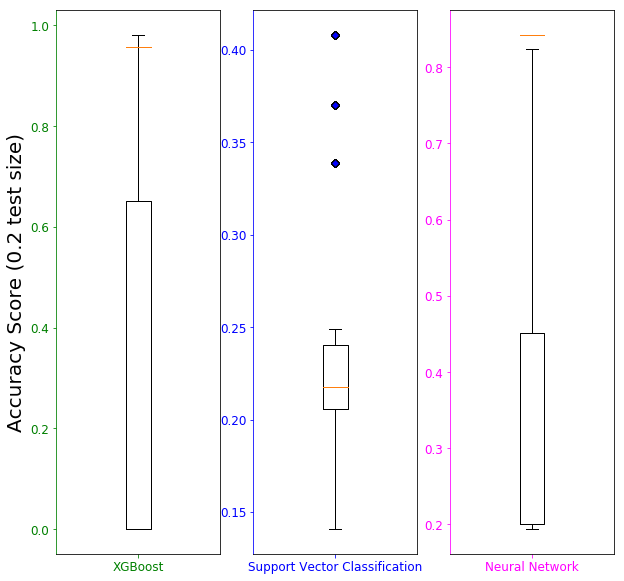

In [12]:
fig = plt.figure(figsize=[10, 10])
xgboost_default = 
svc_default = 


ax1 = fig.add_subplot(131)
ax1.boxplot(xgboost_scores, whis=2, usermedians=xgboost_deafult, labels = ['XGBoost'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 12)
ax1.set_ylabel("Accuracy Score (0.2 test size)", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(svc_scores, whis=2, usermedians=[0.21768607221812822], labels = ['Support Vector Classification'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=12)

ax3 = fig.add_subplot(133)
ax3.boxplot(neural_network_scores, whis=2, usermedians=[0.8422991893883567], labels = ['Neural Network'], \
            flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=12)

plt.show()
fig.savefig("../box_plot_Accuracy_20.png")

In [9]:
xgboost_123_scores = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_123/log_1549830455.txt")
xgboost_456_scores = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_456/log_1549867297.txt")
svc_123_scores = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_123/log_1549868103.txt")
svc_456_scores = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_456/log_1549902436.txt")
neural_network_123_scores = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/neural_network_123/log_1549840300.txt")
neural_network_456_scores = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/neural_network_456/log_1549851642.txt")




/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_123/log_1549830455.txt
/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_456/log_1549867297.txt
/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_123/log_1549868103.txt
/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_456/log_1549902436.txt
/Users/michaelzhang/Downloads/Seneca/cloudwatch/neural_network_123/log_1549840300.txt
/Users/michaelzhang/Downloads/Seneca/cloudwatch/neural_network_456/log_1549851642.txt


In [10]:
print(min(xgboost_123_scores))
print(max(xgboost_123_scores))
print(min(xgboost_456_scores))
print(max(xgboost_456_scores))
print(min(svc_123_scores))
print(max(svc_123_scores))
print(min(svc_456_scores))
print(max(svc_456_scores))
print(min(neural_network_123_scores))
print(max(neural_network_123_scores))
print(min(neural_network_456_scores))
print(max(neural_network_456_scores))

0.0
0.9811348563006632
0.0
0.9770081061164333
0.14075165806927045
0.4081061164333088
0.10036845983787768
0.5411938098747237
0.19145173176123803
0.8331613854089904
0.1939572586588062
0.8392041267501842


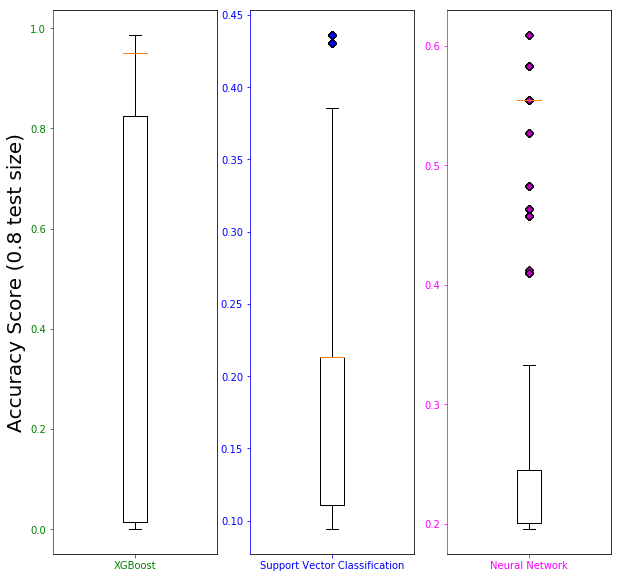

In [66]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(xgboost_scores, whis=2, usermedians=[0.9507369196757554], labels = ['XGBoost'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 10)
ax1.set_ylabel("Accuracy Score (0.8 test size)", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(svc_scores, whis=2, usermedians=[0.21308032424465734], labels = ['Support Vector Classification'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=10)

ax3 = fig.add_subplot(133)
ax3.boxplot(neural_network_scores, whis=2, usermedians=[0.5543846720707443], labels = ['Neural Network'], \
            flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=10)

plt.show()
fig.savefig("../box_plot_Accuracy_80.png")

In [83]:
xgboost_scores = parse("../cloudwatch/Opt_memory/999_Test/XGBoost_log_768.txt")
svc_scores = parse("../cloudwatch/Opt_memory/999_Test/SVC_log_512.txt")
neural_network_scores = parse("../cloudwatch/Opt_memory/999_Test/Neural_Network_log_432.txt")

../cloudwatch/Opt_memory/999_Test/XGBoost_log_768.txt
../cloudwatch/Opt_memory/999_Test/SVC_log_512.txt
../cloudwatch/Opt_memory/999_Test/Neural_Network_log_432.txt


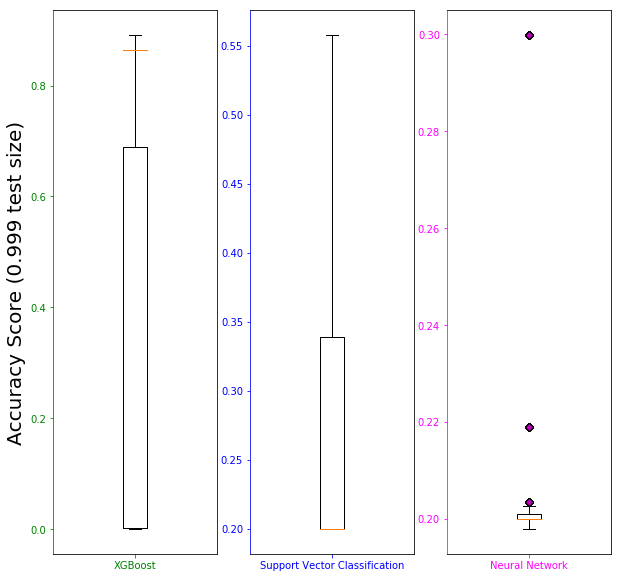

In [68]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(xgboost_scores, whis=2, usermedians=[0.8637436563200755], labels = ['XGBoost'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 10)
ax1.set_ylabel("Accuracy Score (0.999 test size)", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(svc_scores, whis=2, usermedians=[0.2001947362209371], labels = ['Support Vector Classification'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=10)

ax3 = fig.add_subplot(133)
ax3.boxplot(neural_network_scores, whis=2, usermedians=[0.1999586923167709], labels = ['Neural Network'], \
            flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=10)

plt.show()
fig.savefig("../box_plot_Accuracy_999.png")

In [78]:
min(xgboost_mse)

0.04391859915648301

In [42]:
xgboost_123_mse = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_123/log_1549830455.txt", "Mean Absolute Error")
xgboost_456_mse = parse("/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_456/log_1549867297.txt", "Mean Absolute Error")
prophet_mse = parse("../cloudwatch/Opt_Memory/Prophet_log_384.txt", "Metric mse")
multi_regression_mse = parse("../cloudwatch/Opt_Memory/Multi_Regression_log_255.txt", "The MSE of prediction is")

/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_123/log_1549830455.txt
/Users/michaelzhang/Downloads/Seneca/cloudwatch/xgboost_456/log_1549867297.txt
../cloudwatch/Opt_Memory/Prophet_log_384.txt
../cloudwatch/Opt_Memory/Multi_Regression_log_255.txt


In [44]:
print(min(xgboost_123_mse))
print(max(xgboost_123_mse))
print(min(xgboost_456_mse))
print(max(xgboost_456_mse))
print(min(prophet_mse))
print(max(prophet_mse))
print(min(multi_regression_mse))
print(max(multi_regression_mse))

0.06497307498400583
8.231307999492131
0.06957646069846438
8.202637778333468
0.2132220134206787
0.9874228895115101
9.620918439489264
43.75182238704921


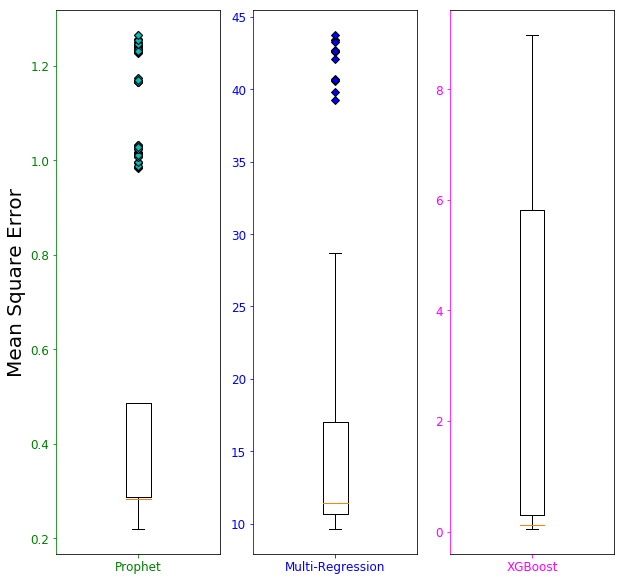

In [12]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(prophet_mse, whis=2, usermedians=[0.28436439806726066], labels = ['Prophet'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 12)
ax1.set_ylabel("Mean Square Error", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(multi_regression_mse, whis=2, usermedians=[11.445971625426504], labels = ['Multi-Regression'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=12)

ax3 = fig.add_subplot(133)
ax3.boxplot(xgboost_mse, whis=2, usermedians=[0.11894475805820923], labels = ['XGBoost'], flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=12)

plt.show()
fig.savefig("../box_plot_MSE.png")